In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
import os

Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [6]:
test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [33]:
train['label'].nunique()

10

In [8]:
train.shape

(42000, 785)

In [9]:
X = train.drop(['label'], axis =1)
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from keras.utils.np_utils import to_categorical
y = train['label']
y1 = train['label']
y = to_categorical(y)
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [42]:
#EDA

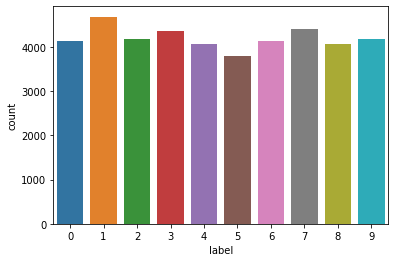

In [12]:
sns.countplot(y1)

## NORMILIZATION

In [13]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X = X/255.0
test = test/255.0

## Reshaping

In [16]:
X = np.array(X).reshape(-1, 28, 28, 1)
test = np.array(test).reshape(-1, 28, 28, 1)
print(X.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =4)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600, 10), (8400, 10))

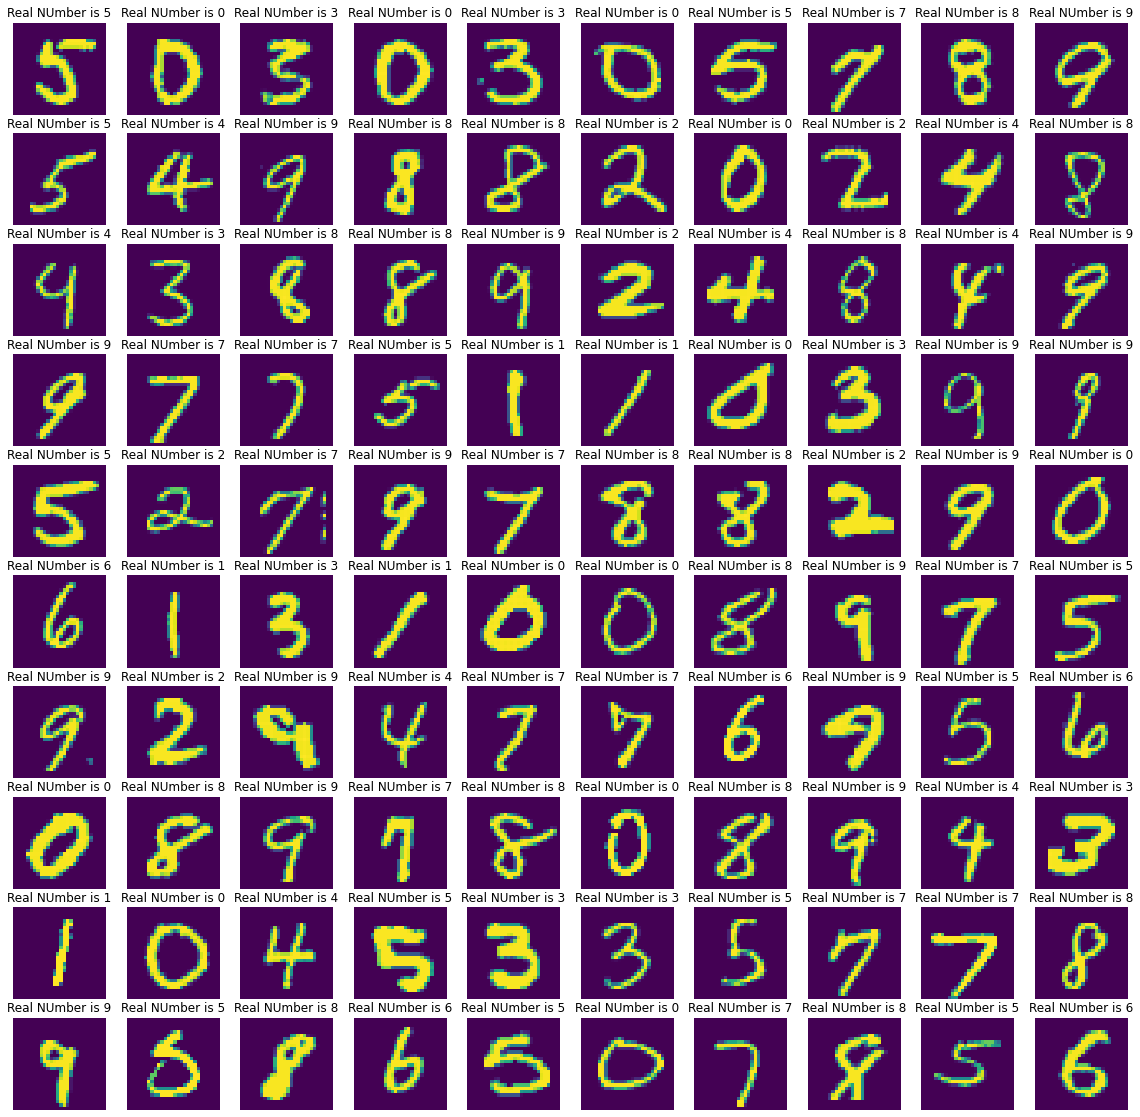

In [18]:
fig, axis = plt.subplots(10, 10, figsize=(20, 20))

for i, ax in enumerate(axis.flat):
    ax.imshow(X_train[i].reshape(28,28))
    ax.axis('off')
    ax.set_title(f'Real NUmber is {y_train[i].argmax()}')

## CNN(Convolutional Neural Networks)

* size of image will be height * width * 3(R:red,G:green,B:blue)
*  cnn is feed-forward artifical neutral net work it has three layer namely mentioned below
*      1 convlution layer
*      2 relu layer
*      3 pooling layer
*      4 fully connected
* Now in a traditional convolutional neural network architecture, there are other layers that are interspersed between these conv layers. I’d strongly encourage those interested to read up on them and understand their function and effects, but in a general sense, they provide nonlinearities and preservation of dimension that help to improve the robustness of the network and control overfitting. A classic CNN architecture would look like this.The last layer, however, is an important one and one that we will go into later on. Let’s just take a step back and review what we’ve learned so far. We talked about what the filters in the first conv layer are designed to detect. They detect low level features such as edges and curves. As one would imagine, in order to predict whether an image is a type of object, we need the network to be able to recognize higher level features such as hands or paws or ears. So let’s think about what the output of the network is after the first conv layer. It would be a 28 x 28 x 3 volume (assuming we use three 5 x 5 x 3 filters).  When we go through another conv layer, the output of the first conv layer becomes the input of the 2nd conv layer.  Now, this is a little bit harder to visualize. When we were talking about the first layer, the input was just the original image. However, when we’re talking about the 2nd conv layer, the input is the activation map(s) that result from the first layer. So each layer of the input is basically describing the locations in the original image for where certain low level features appear. Now when you apply a set of filters on top of that (pass it through the 2nd conv layer), the output will be activations that represent higher level features. Types of these features could be semicircles (combination of a curve and straight edge) or squares (combination of several straight edges). As you go through the network and go through more conv layers, you get activation maps that represent more and more complex features. By the end of the network, you may have some filters that activate when there is handwriting in the image, filters that activate when they see pink objects, etc. If you want more information about visualizing filters in ConvNets, Matt Zeiler and Rob Fergus had an excellent research paper discussing the topic. Jason Yosinski also has a video on YouTube that provides a great visual representation. Another interesting thing to note is that as you go deeper into the network, the filters begin to have a larger and larger receptive field, which means that they are able to consider information from a larger area of the original input volume (another way of putting it is that they are more responsive to a larger region of pixel space).
Now that we can detect these high level features, the icing on the cake is attaching a fully connected layer to the end of the network. This layer basically takes an input volume (whatever the output is of the conv or ReLU or pool layer preceding it) and outputs an N dimensional vector where N is the number of classes that the program has to choose from. For example, if you wanted a digit classification program, N would be 10 since there are 10 digits. Each number in this N dimensional vector represents the probability of a certain class. For example, if the resulting vector for a digit classification program is [0 .1 .1 .75 0 0 0 0 0 .05], then this represents a 10% probability that the image is a 1, a 10% probability that the image is a 2, a 75% probability that the image is a 3, and a 5% probability that the image is a 9 (Side note: There are other ways that you can represent the output, but I am just showing the softmax approach). The way this fully connected layer works is that it looks at the output of the previous layer (which as we remember should represent the activation maps of high level features) and determines which features most correlate to a particular class. For example, if the program is predicting that some image is a dog, it will have high values in the activation maps that represent high level features like a paw or 4 legs, etc. Similarly, if the program is predicting that some image is a bird, it will have high values in the activation maps that represent high level features like wings or a beak, etc. Basically, a FC layer looks at what high level features most strongly correlate to a particular class and has particular weights so that when you compute the products between the weights and the previous layer, you get the correct probabilities for the different classes.
*

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten ,BatchNormalization , MaxPool2D
from keras.layers.convolutional import Conv2D
from keras.preprocessing.image import ImageDataGenerator

In [20]:
#FIRST
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=48, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Second
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 48, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


#Third
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.4))

#Output
model.add(Dense(10, activation = "softmax"))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 48)        27696     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 48)        192       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 48)         

In [22]:
model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
##IMAGE DATA GENERATOR

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

In [24]:
datagen

In [25]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=56),
                              epochs = 10, validation_data = (X_test,y_test),
                              verbose = 2, steps_per_epoch=660)


Epoch 1/10
 - 184s - loss: 0.5189 - accuracy: 0.8350 - val_loss: 0.0802 - val_accuracy: 0.9762
Epoch 2/10
 - 177s - loss: 0.1451 - accuracy: 0.9598 - val_loss: 0.0627 - val_accuracy: 0.9820
Epoch 3/10
 - 196s - loss: 0.1104 - accuracy: 0.9700 - val_loss: 0.1157 - val_accuracy: 0.9683
Epoch 4/10
 - 194s - loss: 0.0925 - accuracy: 0.9748 - val_loss: 0.0526 - val_accuracy: 0.9873
Epoch 5/10
 - 184s - loss: 0.0834 - accuracy: 0.9779 - val_loss: 0.0997 - val_accuracy: 0.9749
Epoch 6/10
 - 179s - loss: 0.0767 - accuracy: 0.9800 - val_loss: 0.0426 - val_accuracy: 0.9877
Epoch 7/10
 - 176s - loss: 0.0705 - accuracy: 0.9818 - val_loss: 0.0404 - val_accuracy: 0.9902
Epoch 8/10
 - 177s - loss: 0.0661 - accuracy: 0.9809 - val_loss: 0.0441 - val_accuracy: 0.9879
Epoch 9/10
 - 177s - loss: 0.0618 - accuracy: 0.9840 - val_loss: 0.0474 - val_accuracy: 0.9864
Epoch 10/10
 - 178s - loss: 0.0567 - accuracy: 0.9846 - val_loss: 0.0628 - val_accuracy: 0.9851


Test Score: 0.06280354030205108
Test Accuracy: 0.9851190447807312


<Figure size 432x288 with 0 Axes>

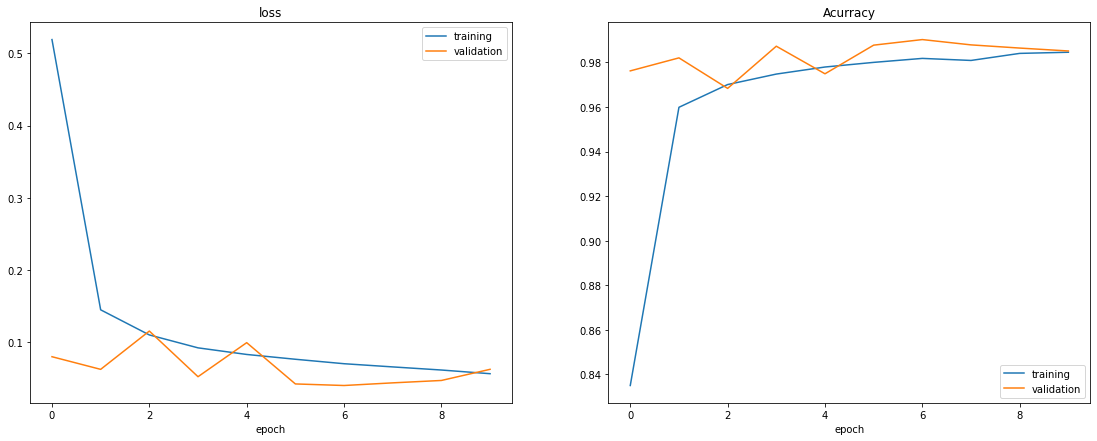

In [28]:
plt.figure()
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(19,7))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['training','validation'])
ax1.set_title('loss')
ax1.set_xlabel('epoch')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['training','validation'])
ax2.set_title('Acurracy')
ax2.set_xlabel('epoch')



score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

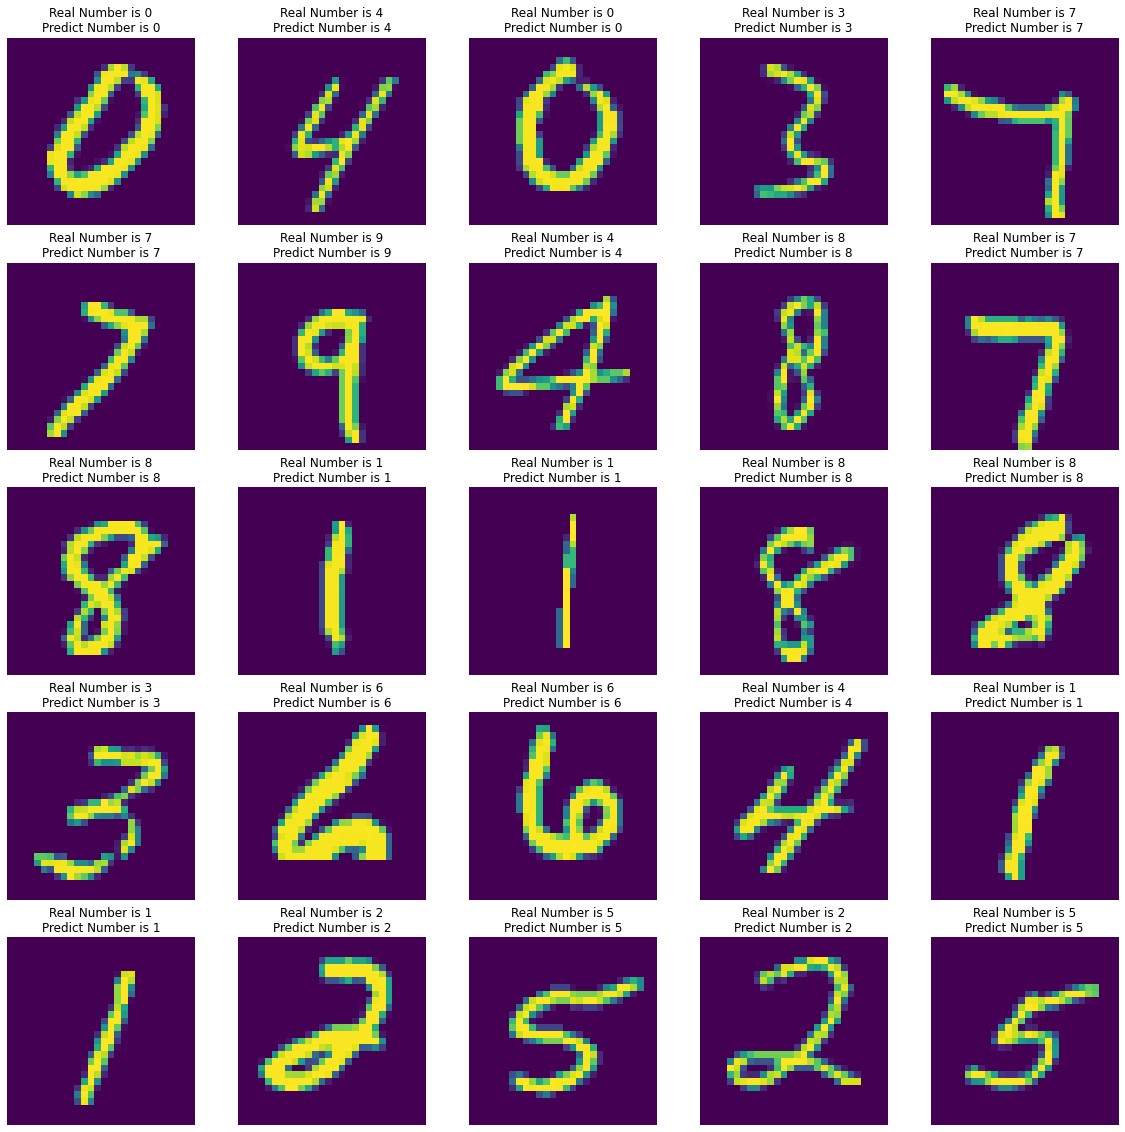

In [30]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(5, 5, figsize=(20, 20))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i])
    ax.axis('off')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");
    

In [31]:
results = model.predict(test)

results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("CNN_Digit_Recognizer.csv",index=False)